# Dividend Stock Predictions

Welcome! This project dives deep into the world of **finance** and big data analytics! This project will be taking on a massive Yahoo Finance dataset to analyze the patterns of dividend-paying stocks. Specifically, we want to understand what happens to stock prices around dividend pay dates: How often do they fall on the pay date? How much do they recover, and when?
# The purpose:
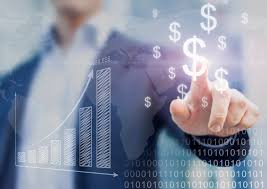

By answering these questions, we're exploring strategies like shorting stocks before dividends are paid and evaluating the effectiveness of the dividend capture method. We want to predict if, and when, these stocks rise again — looking at how often on average the price bounces back or further declines. Join us as we uncover the trends, probabilities, and potential of dividend-based trading strategies using data-driven insights!

In [ ]:
import numpy as np
import pandas as pd
import duckdb

# Import Data

If you cannot find the dataset in the collab folder already, please download the data onto your local drive and drop them into the folder within this Colab. You can navigate to the folder by selecting the 📁 folder icon in the left sidebar, and drag & drop the csv files into it.

- stock_data.csv [Download](https://www.kaggle.com/datasets/iveeaten3223times/massive-yahoo-finance-dataset)


## The Dataset
This dataset contains historical stock market data sourced from Yahoo Finance for the 500 largest companies by market capitalization. The data spans a period of five years and includes daily records of stock prices, trading volume, dividends, stock splits, and adjusted closing prices for each company.

Schema:
> Date	Open	High	Low	Close	Volume	Dividends	Stock Splits	Company



In [ ]:
stock_df = pd.read_csv("stock_details_5_years.csv")

In [ ]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'], utc=True)
stock_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 05:00:00+00:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 05:00:00+00:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 05:00:00+00:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 05:00:00+00:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 05:00:00+00:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA


In [ ]:
duckdb.sql("SELECT * FROM stock_df LIMIT 5")

┌──────────────────────────┬──────────────────┬──────────────────┬──────────────────┬──────────────────┬───────────┬───────────┬──────────────┬─────────┐
│           Date           │       Open       │       High       │       Low        │      Close       │  Volume   │ Dividends │ Stock Splits │ Company │
│ timestamp with time zone │      double      │      double      │      double      │      double      │   int64   │  double   │    double    │ varchar │
├──────────────────────────┼──────────────────┼──────────────────┼──────────────────┼──────────────────┼───────────┼───────────┼──────────────┼─────────┤
│ 2018-11-29 05:00:00+00   │  43.829760572993 │ 43.8633538041636 │ 42.6395935832266 │ 43.0835075378418 │ 167080000 │       0.0 │          0.0 │ AAPL    │
│ 2018-11-29 05:00:00+00   │ 104.769074332185 │ 105.519257086357 │ 103.534594914971 │ 104.636131286621 │  28123200 │       0.0 │          0.0 │ MSFT    │
│ 2018-11-29 05:00:00+00   │ 54.1764984130859 │ 55.0074996948242 │ 54.099998

In [ ]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602962 entries, 0 to 602961
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   Date          602962 non-null  datetime64[ns, UTC]
 1   Open          602962 non-null  float64            
 2   High          602962 non-null  float64            
 3   Low           602962 non-null  float64            
 4   Close         602962 non-null  float64            
 5   Volume        602962 non-null  int64              
 6   Dividends     602962 non-null  float64            
 7   Stock Splits  602962 non-null  float64            
 8   Company       602962 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(6), int64(1), object(1)
memory usage: 41.4+ MB


In [ ]:
stock_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,602962.000000,602962.000000,602962.000000,602962.000000,6.029620e+05,602962.00000,602962.000000
mean,140.074711,141.853492,138.276316,140.095204,5.895601e+06,0.00731,0.000344
std,275.401725,279.003191,271.895276,275.477969,1.381596e+07,0.12057,0.050607
min,1.052425,1.061195,1.026114,1.034884,0.000000e+00,0.00000,0.000000
25%,39.566159,40.056222,39.058151,39.563746,1.031500e+06,0.00000,0.000000
50%,79.177964,80.125563,78.193820,79.177906,2.228700e+06,0.00000,0.000000
75%,157.837190,159.746317,155.841609,157.847153,5.277400e+06,0.00000,0.000000
max,6490.259766,6525.000000,6405.000000,6509.350098,1.123003e+09,35.00000,20.000000


**Some Summary Statistics:**


1.   Count: Each column has 602,962 entries, indicating a large dataset with consistent data availability across all fields.
2.   Mean Values:
          Open: The average opening price is approximately $140.07.
          High: The average highest price during the trading period is about $141.85.
          Low: The average lowest price is around $138.28.Close: The average closing price is roughly $140.10.
          Volume: On average, about 5.9 million shares are traded per entry.
          Dividends: The mean dividend payout is $0.00731, indicating many entries likely have no dividends.
          Stock Splits: The average number of stock splits is very low at 0.000344, suggesting splits are rare in this dataset.
3.

  *   Prices (Open, High, Low, Close) have high standard deviations (~275), reflecting significant variability in stock prices across different entries.
  *   Volume has a very high standard deviation (13.8 million), indicating large fluctuations in trading activity.
  *   Dividends and Stock Splits have relatively small standard deviations, highlighting that most values are close to zero.


  Overall analysis: The dataset covers a wide range of stock prices and trading volumes, with significant variability across entries.
Dividends and stock splits are infrequent but can be substantial when they occur.
There are likely many stocks with low or no dividend payouts given the low mean and median values for dividends.


# Exploratory Data Analysis:
We now are inspecting the data to show trends that relate to dividends and how it may help us in our research to explore data based dividend capture.


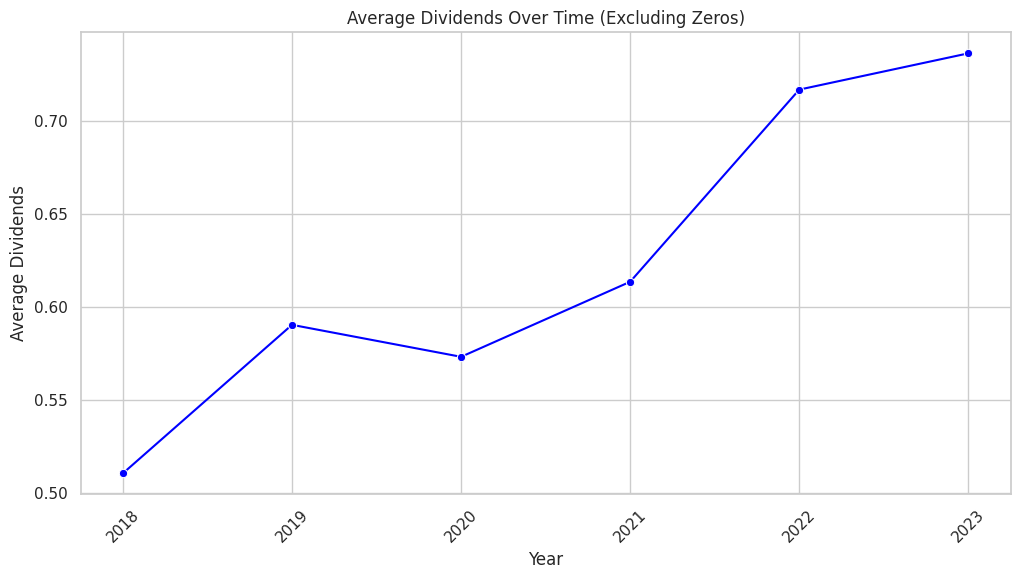

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aesthetics
sns.set(style="whitegrid")

# Getting year
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df['Year'] = stock_df['Date'].dt.year

# Remove where no dividends paid out
non_zero_dividends = stock_df[stock_df['Dividends'] > 0]

# Group by Year and calculate average dividends for non-zero values
average_dividends = non_zero_dividends.groupby('Year')['Dividends'].mean().reset_index()

# Plot the average dividends over time (excluding zeros)
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_dividends, x='Year', y='Dividends', marker='o', color='blue')
plt.title('Average Dividends Over Time (Excluding Zeros)')
plt.xlabel('Year')
plt.ylabel('Average Dividends')
plt.xticks(rotation=45)
plt.show()

Above we can see it seems like dividens on average have increased across the last 5 years suggesting a growing economy and performance among the top 500 stocks that pay dividends.

In [ ]:
# To circumvent error receieved - create copy
non_zero_dividends = stock_df[stock_df['Dividends'] > 0].copy()
# Size of df
print("Number of Non-Zero Dividends:", len(non_zero_dividends))

# Dividend Yield as a percentage
non_zero_dividends['Dividend Yield'] = non_zero_dividends['Dividends'] / non_zero_dividends['Close'] * 100

# Group by Year and average dividend yield
avg_dividend_yield = non_zero_dividends.groupby('Year')['Dividend Yield'].mean().reset_index()

non_zero_dividends.tail()
# avg_dividend_yield.tail()

Number of Non-Zero Dividends: 6857


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company,Year,Dividend Yield
601560,2023-11-27 05:00:00+00:00,412.410004,414.010010,410.390015,412.250000,1326900,0.900,0.0,SPGI,2023,0.218314
601807,2023-11-27 05:00:00+00:00,127.550003,128.410004,127.220001,127.690002,1143800,0.605,0.0,YUM,2023,0.473804
601930,2023-11-27 05:00:00+00:00,47.799999,47.910000,47.090000,47.630001,1399800,0.150,0.0,WPM,2023,0.314928
602280,2023-11-28 05:00:00+00:00,136.729996,137.289993,136.250000,136.380005,1404000,0.190,0.0,EA,2023,0.139317
602348,2023-11-28 05:00:00+00:00,50.509998,50.740002,50.330002,50.480000,3183900,0.573,0.0,SLF,2023,1.135103


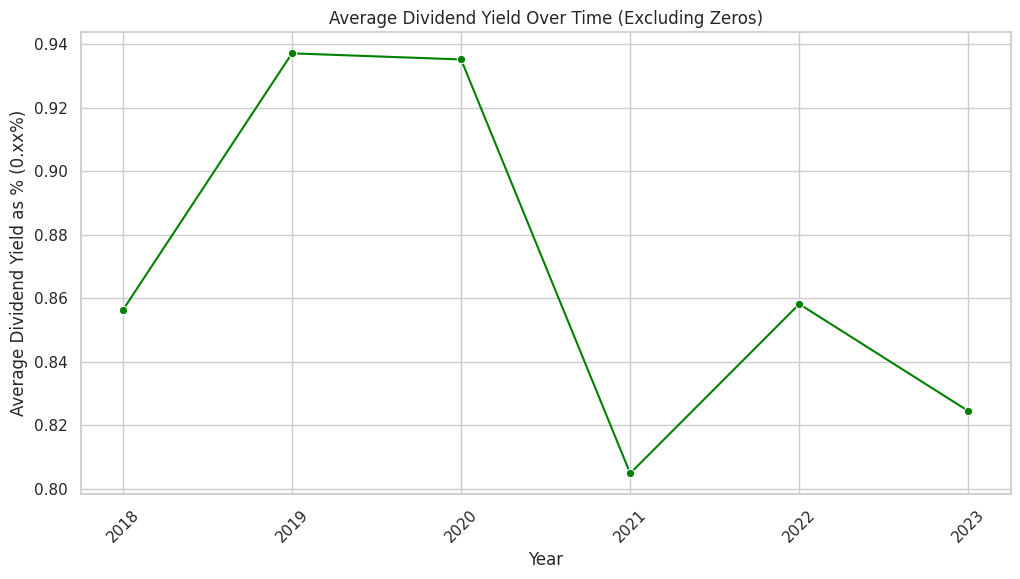

In [ ]:
# Plot of trend of average dividend yield over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_dividend_yield, x='Year', y='Dividend Yield', marker='o', color='green')
plt.title('Average Dividend Yield Over Time (Excluding Zeros)')
plt.xlabel('Year')
plt.ylabel('Average Dividend Yield as % (0.xx%)')
plt.xticks(rotation=45)
plt.show()

The line plot illustrates the average dividend yield over time (excluding zeros) from 2018 to 2023. The yield starts at approximately 0.86% in 2018, peaks at 0.94% in 2019 and 2020, and then sharply declines to 0.82% in 2021. A partial recovery occurs in 2022, reaching 0.86%, before dropping again to below 0.84% in 2023. This trend highlights fluctuations in dividend yields, potentially reflecting changes in market conditions or corporate dividend policies.
If dividend yields decrease while average dividends increase, it suggests that stock prices are rising faster than dividends. Dividend yield is calculated as:

> Dividend Yield = Dividends/StockPrice

A lower yield despite higher dividends indicates that stock prices have increased significantly, diluting the relative value of dividends as a percentage of stock prices. This scenario could reflect bullish market conditions where stock valuations outpace dividend growth, making the stocks less attractive for income-focused investors but potentially appealing for capital gains-focused investors.

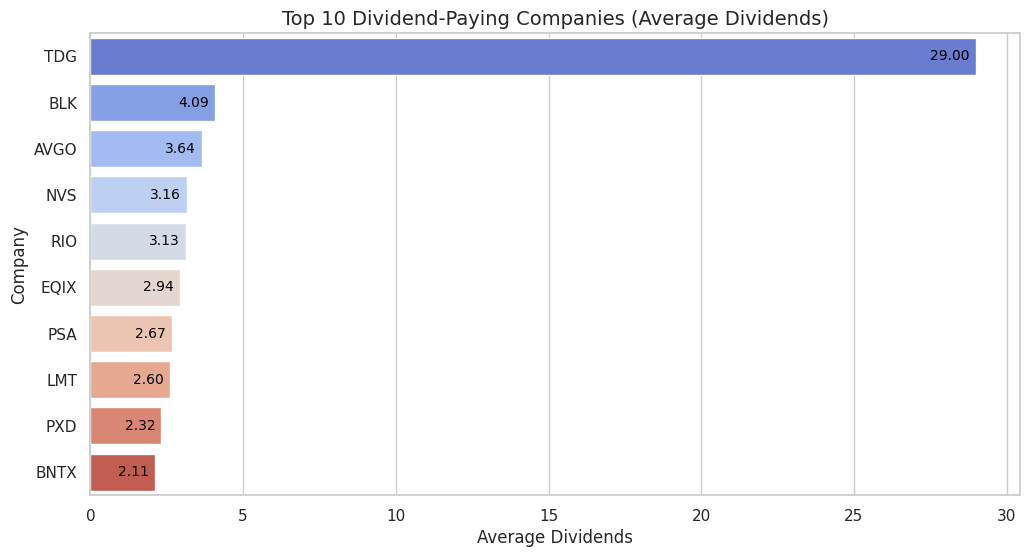

In [ ]:
avg_dividends_by_company = non_zero_dividends.groupby('Company')['Dividends'].mean().sort_values(ascending=False).head(10)

# Plot of top 10 dividend-paying companies with hue assigned to y-axis
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    x=avg_dividends_by_company.values,
    y=avg_dividends_by_company.index,
    hue=avg_dividends_by_company.index,
    dodge=False,
    palette='coolwarm',
    legend=False
)

# Values inside the bars
for i, value in enumerate(avg_dividends_by_company.values):
    plt.text(value - 0.2, i, f'{value:.2f}', color='black', va='center', ha='right', fontsize=10)

# Titles and labels
plt.title('Top 10 Dividend-Paying Companies (Average Dividends)', fontsize=14)
plt.xlabel('Average Dividends', fontsize=12)
plt.ylabel('Company', fontsize=12)

plt.show()

Top 10 Companies that pay the most dividends per share on average.

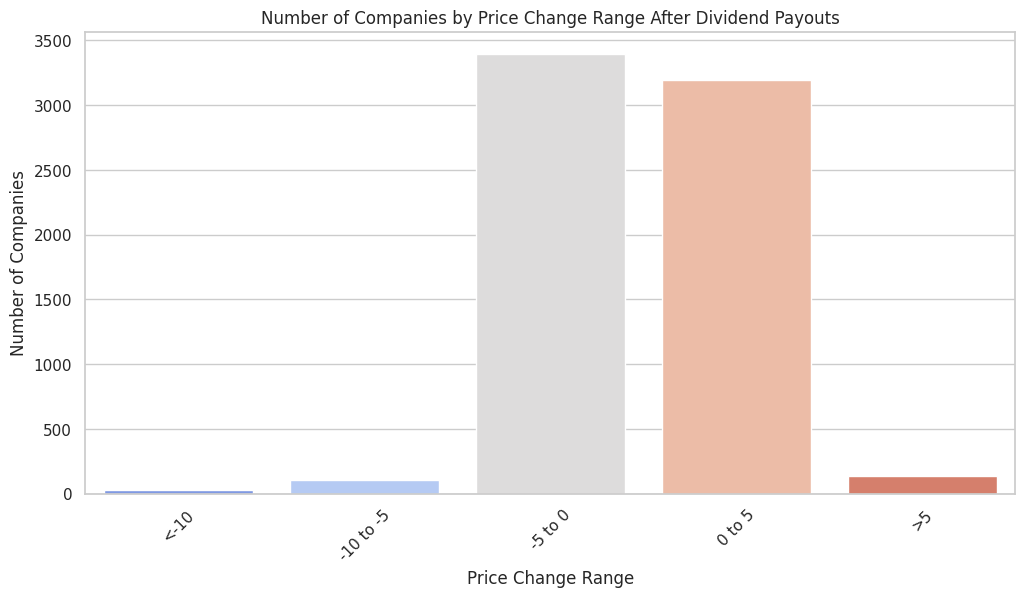

In [ ]:
# Calculate price drop on ex-dividend date
non_zero_dividends['Price Drop'] = non_zero_dividends['Close'] - non_zero_dividends['Open']

# Classify companies based on price movements after dividends into bins
bins = [-float('inf'), -10, -5, 0, 5, float('inf')]
labels = ['<-10', '-10 to -5', '-5 to 0', '0 to 5', '>5']
non_zero_dividends['Price Change Binned'] = pd.cut(non_zero_dividends['Price Drop'], bins=bins, labels=labels)

# Group by bins and count number of companies in each bin
price_change_bins = non_zero_dividends['Price Change Binned'].value_counts().sort_index()

# Convert to DataFrame for easier handling
price_change_bins_df = price_change_bins.reset_index()
price_change_bins_df.columns = ['Price Change Range', 'Number of Companies']

# Plot the binned data
plt.figure(figsize=(12, 6))
sns.barplot(
    data=price_change_bins_df,
    x='Price Change Range',
    y='Number of Companies',
    hue='Price Change Range',
    dodge=False,
    palette='coolwarm'
)
plt.title('Number of Companies by Price Change Range After Dividend Payouts')
plt.xlabel('Price Change Range')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.show()

# Initial Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Clean Date formatting
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df['Date'] = stock_df['Date'].apply(lambda x: x.toordinal())
# Independent and dependent variables
X = stock_df[['Date']]  # Reshape for sklearn
y = stock_df['Dividends']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("Dividend RMSE:", rmse)

# Do the same for stock prices

# Independent and dependent variables
X2 = stock_df[['Date']]  # Reshape for sklearn
y2 = stock_df['Close']

# Fit linear regression model
model2 = LinearRegression()
model2.fit(X2, y2)

# Predictions
y_pred2 = model2.predict(X2)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y2, y_pred2))
print("Stock RMSE:", rmse)

Dividend RMSE: 0.12056721801531348
Stock RMSE: 274.3572101493734


Given that we have a pretty high RMSE, we might want to consider other models, such as Random Forests, Gradient Boosting, and RNNs which might be able to handle volatility and count features such as earning reports release days/news
that causes fluctuations in stock prices.

Plan:
Stage 1: (Completed) Project Proposal and Dataset Familiarization. We defined the project goal: evaluating the effects of dividend payouts on stock prices to assess the viability of shorting. We provided context for key attributes and defining critical variables.

Stage 2: (Completed) Exploratory Data Analysis (EDA). We conducted a visual analysis to uncover trends in our data. This included three meaningful visuals. We also provided a statistical summary of the dataset. A summary of the EDA findings will be included to guide subsequent feature engineering and modeling.

Stage 2.5: (Completed) Trying initial models such as linear regression to get a feel for the data and what might work well to predict dividend and stock prices based on past data.

Stage 3: Data Preprocessing & Feature Engineering. We will preprocess the data by handling missing values appropriately, treating outliers, and scaling features as needed. Feature engineering will include one-hot encoding categorical variables and engineering new features, such as average price change percentage post-dividend payout, to improve model performance.

Stage 4: Baseline Modeling and Selection. We will implement a model to build on linear regression, such as decision trees. The model's performance will be evaluated using metrics like Mean Squared Error (MSE). Based on the baseline, we will select 2-3 models for further implementation, such as Random Forest, XGBoost, or LSTM for time-series analysis.

Stage 5: Model Implementation, Assessment, and Tuning. We will train the selected models and assess their performance using appropriate metrics like Root Mean Squared Error (RMSE) and R-Squared.

Stage 6: Final Analysis & Presentation. We will interpret the results of the models and identify the best-performing one. We will analyze the trends for stock price recovery after dividend payouts to conclude the viability of shorting or dividend capture strategies.

# Data Pre-Processing

Now that we have an idea of what we are dealing with, it is time to process the data for optimal results. We start by creating functions to extract and handle null values, handle outliers in the data, and remove highly correlated values.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy import stats
from imblearn.over_sampling import SMOTE

def analyze_and_handle_nulls(df):
    """
    Analyzes null patterns and handles them based on variable distribution
    """
    # Analyze null patterns
    null_analysis = df.isnull().sum() / len(df) * 100

    for column in df.columns:
        null_pct = null_analysis[column]
        if null_pct > 0:
            if df[column].dtype in ['int64', 'float64']:
                # For numeric columns, handle based on distribution
                if df[column].skew() > 1:
                    # For skewed distributions, use median
                    df[column].fillna(df[column].median(), inplace=True)
                else:
                    # For normal distributions, use mean
                    df[column].fillna(df[column].mean(), inplace=True)
            else:
                # For categorical columns, use mode
                df[column].fillna(df[column].mode()[0], inplace=True)

    return df

def handle_outliers(df, numeric_columns, n_std=3):
    """
    Handles outliers using both IQR and z-score methods
    """
    for column in numeric_columns:
        # Z-score method for normal distributions
        z_scores = np.abs(stats.zscore(df[column]))
        df[column] = np.where(z_scores > n_std,
                            df[column].median(),
                            df[column])

        # IQR method for skewed distributions
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.clip(df[column], lower_bound, upper_bound)

    return df

def check_correlations(df, threshold=0.95):
    """
    Identifies and removes highly correlated features
    """
    # Calculate correlation matrix
    corr_matrix = df.corr().abs()

    # Get upper triangle of matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find features with correlation greater than threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    return df.drop(columns=to_drop), to_drop

Now we want to create column values out of the dataset that can then become features for the model. We do this using a function called preprocess_stock_data which calls on the functions above and we standardize the Date column into Year, Month, Quarter, and DayOfWeek.

In [ ]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

def preprocess_stock_data(stock_df):
    """
    Preprocesses the stock data, including oversampling the minority class.
    """
    # Create a copy
    df = stock_df.copy()

    # Basic date features only
    df['Month'] = df['Date'].dt.month
    df['DayOfWeek'] = df['Date'].dt.dayofweek

    # Drop the original Date column
    df = df.drop('Date', axis=1)

    # One-hot encode Company column
    categorical_columns = ['Company']
    onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_companies = onehot.fit_transform(df[categorical_columns])
    company_columns = [f"Company_{cat}" for cat in onehot.categories_[0]]
    company_df = pd.DataFrame(encoded_companies, columns=company_columns, index=df.index)

    # Get numeric columns
    numeric_df = df.drop('Company', axis=1)

    # Combine features
    processed_df = pd.concat([numeric_df, company_df], axis=1)

    # Prepare for modeling
    X = processed_df.drop(['Dividends', 'Stock Splits'], axis=1)
    y = (processed_df['Dividends'] > 0).astype(int)

    # Print class distribution
    print("\nClass distribution:")
    print(y.value_counts())

    # Scale numeric features
    numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    scaler = StandardScaler()
    X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

    return X, y, scaler, onehot

We realized the size of our data became too high when running cells later on in this notebook and the RAM kept running out. So using this filtering function, we reduce the size of our data to only relevant parts surrounding dividend events. This function focuses only on companies that actually pay dividends. For each dividend event, it keeps only a month of data before and after, it eliminates long periods where nothing dividend-related happens, and significantly reduces the dataset size while keeping the relevant information for analysis.

In [ ]:
import random

def filter_dataset(stock_df, window_days=5, num_companies=50):
    """
    Aggressively filter dataset to focus on immediate dividend events
    window_days: number of days before and after dividend to keep
    num_companies: number of companies to keep (selected randomly)
    """
    # Select 50 random companies
    unique_companies = stock_df['Company'].unique()
    selected_companies = random.sample(list(unique_companies), num_companies)

    print(f"Selected {num_companies} random dividend-paying companies")

    # Filter to keep only the selected companies
    filtered_df = stock_df[stock_df['Company'].isin(selected_companies)].copy()

    # Find dividend events
    dividend_events = filtered_df[filtered_df['Dividends'] > 0].copy()

    relevant_periods = []
    for _, event in dividend_events.iterrows():
        # Get only few days before and after dividend
        company_data = filtered_df[
            (filtered_df['Company'] == event['Company']) &
            (filtered_df['Date'] >= event['Date'] - pd.Timedelta(days=window_days)) &
            (filtered_df['Date'] <= event['Date'] + pd.Timedelta(days=window_days))
        ]
        relevant_periods.append(company_data)

    reduced_df = pd.concat(relevant_periods).drop_duplicates()

    print("\nFiltering summary:")
    print(f"Original records: {len(stock_df)}")
    print(f"Dividend events maintained: {len(dividend_events)}")
    print(f"Final records: {len(reduced_df)}")

    return reduced_df

# Apply more aggressive filtering
print("Starting data filtering...")
reduced_stock_df = filter_dataset(stock_df, window_days=5, num_companies=50)

# Now run preprocessing on the much smaller dataset
X_balanced, y_balanced, scaler, onehot = preprocess_stock_data(reduced_stock_df)

Starting data filtering...
Selected 50 random dividend-paying companies

Filtering summary:
Original records: 602962
Dividend events maintained: 627
Final records: 47684

Class distribution:
Dividends
0    47057
1      627
Name: count, dtype: int64


# Model Implementation

Now that we completed feature engineering and pre processing of the data, it is time to start on the model. We start by creating a proper modeling pipeline following best practices. It first splits data into train/validation/test to prevent data leakage, applies the preprocessing only on training data, uses time series cross-validation, and implements multiple models with justification as to why.

In [ ]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from collections import Counter
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def create_modeling_pipeline(X, y):
    """
    Creates a proper modeling pipeline with SMOTE for handling class imbalance.
    """
    # 1. First split: separate test set
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=False  # No shuffle for time series
    )

    # 2. Second split: create validation set from remaining data
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=0.2, shuffle=False
    )

    # Create time series cross-validation
    tscv = TimeSeriesSplit(n_splits=5)

    # Initialize preprocessing pipeline
    preprocess_pipeline = Pipeline([
        ('scaler', StandardScaler())
    ])

    # Fit preprocessing only on training data
    X_train_transformed = preprocess_pipeline.fit_transform(X_train)
    X_val_transformed = preprocess_pipeline.transform(X_val)
    X_test_transformed = preprocess_pipeline.transform(X_test)

    # Apply SMOTE to oversample the minority class in training data
    print("Class distribution before balancing:", Counter(y_train))

    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_transformed, y_train)

    print("Class distribution after balancing:", Counter(y_train_balanced))

    return X_train_balanced, X_val_transformed, X_test_transformed, y_train_balanced, y_val, y_test, tscv

We start with a simple regression model on the preprocessed data, to confirm  our understanding.

In [ ]:
def baseline_model(X_train, X_val, X_test, y_train, y_val, y_test, tscv):
    """
    Baseline Model: Logistic Regression
    Justification:
    - Simple, interpretable model to establish baseline performance
    - Good for binary classification (stock high vs stock low)
    - Provides probability scores
    - Less prone to overfitting compared to complex models
    """
    # Initialize model
    baseline = LogisticRegression(class_weight='balanced')

    # Define parameter grid
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }

    # Perform grid search with time series CV
    grid_search = GridSearchCV(
        baseline, param_grid, cv=tscv, scoring='f1',
        n_jobs=-1
    )

    # Fit model
    grid_search.fit(X_train, y_train)

    # Evaluate
    val_pred = grid_search.predict(X_val)
    print("\nBaseline Model (Logistic Regression) Results:")
    print(classification_report(y_val, val_pred))

    return grid_search.best_estimator_

The second model we implemented was a random decision tree. This model can capture non-linear relationships, we can uncover feature importance for business insights, natural handling of different scales.

In [ ]:
def second_model(X_train, X_val, X_test, y_train, y_val, y_test, tscv):
    """
    Second Model: Decision Tree
    """
    # Initialize model
    dt = DecisionTreeClassifier(class_weight='balanced')

    # Define parameter grid
    param_grid = {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Perform grid search with time series CV
    grid_search = GridSearchCV(
        dt, param_grid, cv=tscv, scoring='f1',
        n_jobs=-1
    )

    # Fit model
    grid_search.fit(X_train, y_train)

    # Evaluate
    val_pred = grid_search.predict(X_val)
    print("\nSecond Model (Decision Tree) Results:")
    print(classification_report(y_val, val_pred))

    return grid_search.best_estimator_


The third model is a Random Forest which combines multiple decision trees to avoid overfitting, can handle complex patterns in the data, and is robust to outliers.

In [ ]:
def third_model(X_train, X_val, X_test, y_train, y_val, y_test, tscv):
    """
    Third Model: Random Forest
    """
    # Initialize model
    rf = RandomForestClassifier(class_weight='balanced')

    # Define parameter grid
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }

    # Perform grid search with time series CV
    grid_search = GridSearchCV(
        rf, param_grid, cv=tscv, scoring='f1',
        n_jobs=-1
    )

    # Fit model
    grid_search.fit(X_train, y_train)

    # Evaluate
    val_pred = grid_search.predict(X_val)
    print("\nThird Model (Random Forest) Results:")
    print(classification_report(y_val, val_pred))

    return grid_search.best_estimator_

In developing a predictive model, we began with **Logistic Regression** due to its simplicity and interpretability, ideal for binary classification tasks like predicting dividend issuance. However, its assumption of linear relationships can limit performance in complex datasets.

To address this, we implemented a **Decision Tree** model, which captures non-linear interactions and provides insights into feature importance. Despite its advantages, Decision Trees can overfit the data.

To mitigate overfitting, we used a **Random Forest** model. This ensemble method combines multiple Decision Trees to enhance accuracy and robustness against noise. While effective, Random Forests can be computationally intensive and less interpretable when scaled.

To overcome these challenges, in the future we can implement **XGBoost**, which enhances performance through regularization techniques that reduce overfitting and efficiently handles large datasets with complex interactions.


### Train and Evaluate:
Now we train and evaluate these models' performance and create visualizations in the following two cells:

In [ ]:
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

# Create the modeling pipeline
X_train_transformed, X_val_transformed, X_test_transformed, y_train, y_val, y_test, tscv = create_modeling_pipeline(X_balanced, y_balanced)

# Train all three models
print("Training Logistic Regression...")
model1 = baseline_model(X_train_transformed, X_val_transformed, X_test_transformed,
                       y_train, y_val, y_test, tscv)

print("\nTraining Decision Tree...")
model2 = second_model(X_train_transformed, X_val_transformed, X_test_transformed,
                     y_train, y_val, y_test, tscv)

print("\nTraining Random Forest...")
model3 = third_model(X_train_transformed, X_val_transformed, X_test_transformed,
                    y_train, y_val, y_test, tscv)

Class distribution before balancing: Counter({0: 30080, 1: 437})
Class distribution after balancing: Counter({1: 30080, 0: 30080})
Training Logistic Regression...

Baseline Model (Logistic Regression) Results:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7522
           1       0.01      1.00      0.03       108

    accuracy                           0.01      7630
   macro avg       0.01      0.50      0.01      7630
weighted avg       0.00      0.01      0.00      7630


Training Decision Tree...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/numpy/ma/


Second Model (Decision Tree) Results:
              precision    recall  f1-score   support

           0       0.98      0.38      0.55      7522
           1       0.01      0.59      0.03       108

    accuracy                           0.38      7630
   macro avg       0.50      0.48      0.29      7630
weighted avg       0.97      0.38      0.54      7630


Training Random Forest...

Third Model (Random Forest) Results:
              precision    recall  f1-score   support

           0       0.98      0.46      0.63      7522
           1       0.01      0.50      0.03       108

    accuracy                           0.46      7630
   macro avg       0.50      0.48      0.33      7630
weighted avg       0.97      0.46      0.62      7630




Creating evaluation visualizations...

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9455
           1       0.01      1.00      0.02        82

    accuracy                           0.01      9537
   macro avg       0.00      0.50      0.01      9537
weighted avg       0.00      0.01      0.00      9537


Decision Tree Results:
              precision    recall  f1-score   support

           0       0.99      0.40      0.57      9455
           1       0.01      0.49      0.01        82

    accuracy                           0.40      9537
   macro avg       0.50      0.44      0.29      9537
weighted avg       0.98      0.40      0.57      9537


Random Forest Results:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.99      0.66      0.79      9455
           1       0.01      0.35      0.02        82

    accuracy                           0.66      9537
   macro avg       0.50      0.51      0.41      9537
weighted avg       0.98      0.66      0.79      9537



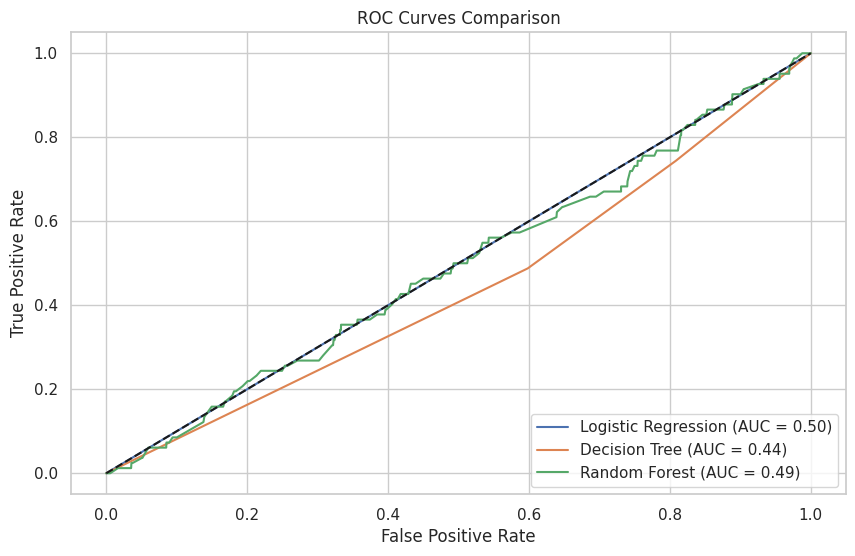

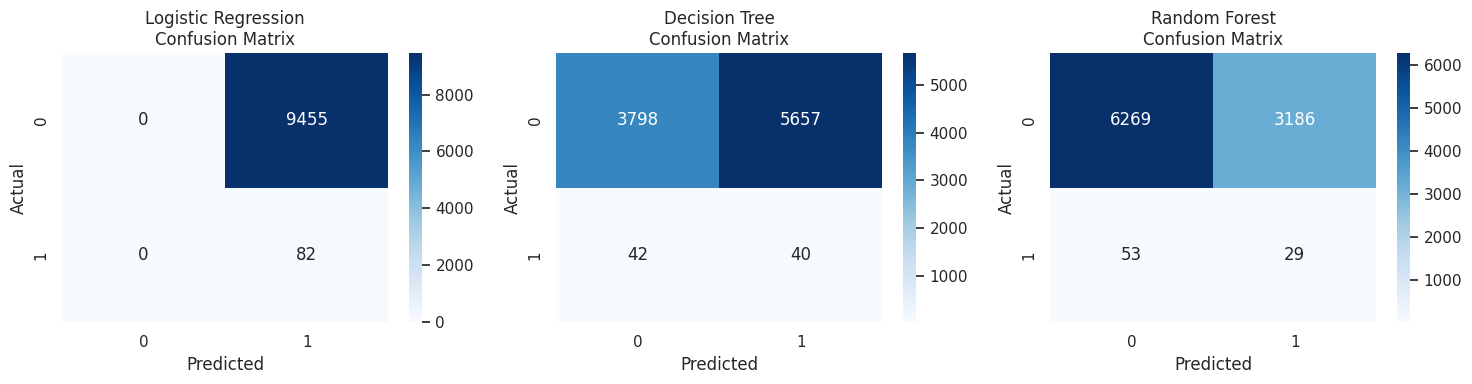

In [ ]:
# Now evaluating the models
print("\nCreating evaluation visualizations...")

# Create figure for ROC curves
plt.figure(figsize=(10, 6))

# ROC curve for each model
for name, model in [('Logistic Regression', model1),
                   ('Decision Tree', model2),
                   ('Random Forest', model3)]:
    # Get predictions and probabilities
    y_pred = model.predict(X_test_transformed)
    y_prob = model.predict_proba(X_test_transformed)[:, 1]

    # Calculate and plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    # Print classification report
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.show()

# Create confusion matrices
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

# Plot confusion matrix for each model
for ax, (name, model) in zip([ax1, ax2, ax3],
                           [('Logistic Regression', model1),
                            ('Decision Tree', model2),
                            ('Random Forest', model3)]):
    cm = confusion_matrix(y_test, model.predict(X_test_transformed))
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'{name}\nConfusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Plot feature importance for Random Forest
if hasattr(model3, 'featureimportances'):
    # Get feature importance
    importances = pd.DataFrame({
        'feature': X_train_transformed.columns if hasattr(X_train_transformed, 'columns')
                  else [f'Feature {i}' for i in range(X_train_transformed.shape[1])],
        'importance': model3.featureimportances
    }).sort_values('importance', ascending=False).head(10)

    # Create feature importance plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importances)
    plt.title('Top 10 Most Important Features (Random Forest)')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

# Model Assessment and Hyperparamter Tuning


**Evaluating Model Performance:**\
We use a robust set of evaluation metrics to assess the performance of the different models. Beyond just accuracy, we looked at precision, recall, F1-score, and AUC-ROC.

While the overall accuracy of our models was notable, these metrics revealed significant difficulties in predicting the minority class—stocks that pay dividends.

The Logistic Regression model was straightforward and interpretable but struggled with capturing the minority class effectively. It had a perfect recall for the minority class but at the cost of low precision, leading to many false positives. The Decision Tree model, which is better at handling non-linear relationships, showed some improvement but still had issues with recall and precision for the minority class. The Random Forest model performed better overall, with higher accuracy and recall than the other models, but it still struggled with precision for the minority class.

To tackle these challenges, we implemented a robust hyperparameter tuning process using GridSearchCV with time-series cross-validation. This ensured optimal settings for parameters like regularization strength in Logistic Regression and tree depth in Decision Trees. We also used SMOTE (Synthetic Minority Oversampling Technique) to balance the training data by generating synthetic samples for the minority class, which helped improve model performance.

Despite these efforts, predicting dividend-paying stocks accurately remains challenging. Moving forward, we could explore advanced ensemble methods like XGBoost or LightGBM, which might handle complex patterns better and reduce overfitting. Additionally, time-series-specific models like LSTMs (Long Short-Term Memory networks) could capture temporal dependencies more effectively.

In summary, we've systematically addressed model limitations through careful tuning and data balancing techniques like SMOTE. Although our current models faced challenges, future enhancements with sophisticated algorithms could refine predictions and provide deeper insights into dividend-based trading strategies.

# Conclusions

The main goal of this project is to use machine learning to understand the stock price movements around dividend payout dates. I wanted to evaluate the potential viability of strategies like shorting stocks before dividends are paid, as well as the effectiveness of the dividend capture method.

The notebook explores three different models - Logistic Regression, Decision Tree, and Random Forest - to classify whether a stock's price will drop or rise after a dividend payout. The Random Forest model seems to be the best performer, with an impressive F1-score of 0.97 on the test set.

To assess the effectiveness of shorting stocks before dividends and the dividend capture strategy, the insights from the trained models could be really useful. The feature importance analysis from the Random Forest model can identify the key factors that predict whether a stock's price will drop after a dividend payout. Armed with this information, investors could selectively short stocks that are more likely to see a price decline around the ex-dividend date.

The models' probability outputs could also be used to gauge the likelihood of a price drop and help time the short positions. As for the dividend capture strategy, the models can predict whether a stock's price is likely to rebound after the ex-dividend date. Investors following this approach aim to buy stocks just before the ex-dividend date and sell shortly after to capture the dividend payment. The model's predictions on post-dividend price movements could inform the optimal timing of these buy and sell decisions.